# FORECASTING PRODUCT DEMANDS OF STORES

## Problem Statement

The model is aimed at making use of time-series forecasting techniques to quantify the demands of products in a store down the line.

## Data Collection

In [16]:
#Loading the dataset to "store_data"
import pandas as pd

store_data = pd.read_csv(r"C:\Users\APJ\OneDrive\Desktop\SUPERSTORE.csv")

In [17]:
#Features of the dataset

store_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [18]:
store_data.shape

(9994, 21)

In [19]:
store_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
## Importing neccesary libraries

from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

There are several types of "categories" in the dataset, we are going to use "Office Supplies" for the purpose of our time series

In [21]:
OS= store_data.loc[store_data['Category']=='Office Supplies']
OS.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [22]:
print('Starting date:',OS['Order Date'].min())
print('Ending date:',OS['Order Date'].max())

Starting date: 2014/01/03
Ending date: 2017/12/30


## DATA PREPROCESSING

In [23]:
## Dropping Unrelavent Variables,

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


OS.drop(cols, axis=1, inplace= True)
OS

C:\Users\APJ\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [24]:
## Check for missing values,

OS.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [25]:
## Aggregate sum os supplies by date:

OS= OS.groupby('Order Date')['Sales'].sum().reset_index()
OS.head()

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430


## IMPORT DATA WITH INDEXING TIME SERIES DATA

In [27]:
OS['Order Date'] = pd.to_datetime(store_data['Order Date'])
OS= OS.set_index('Order Date')
OS

,Sales
Order Date,
2016-11-08,16.448
2016-11-08,288.060
2016-06-12,19.536
2015-10-11,685.340
2015-10-11,10.430
...,...
2014-09-29,814.594
2014-09-29,13.248
2014-09-29,1091.244


## DATA VIZUALIZATION

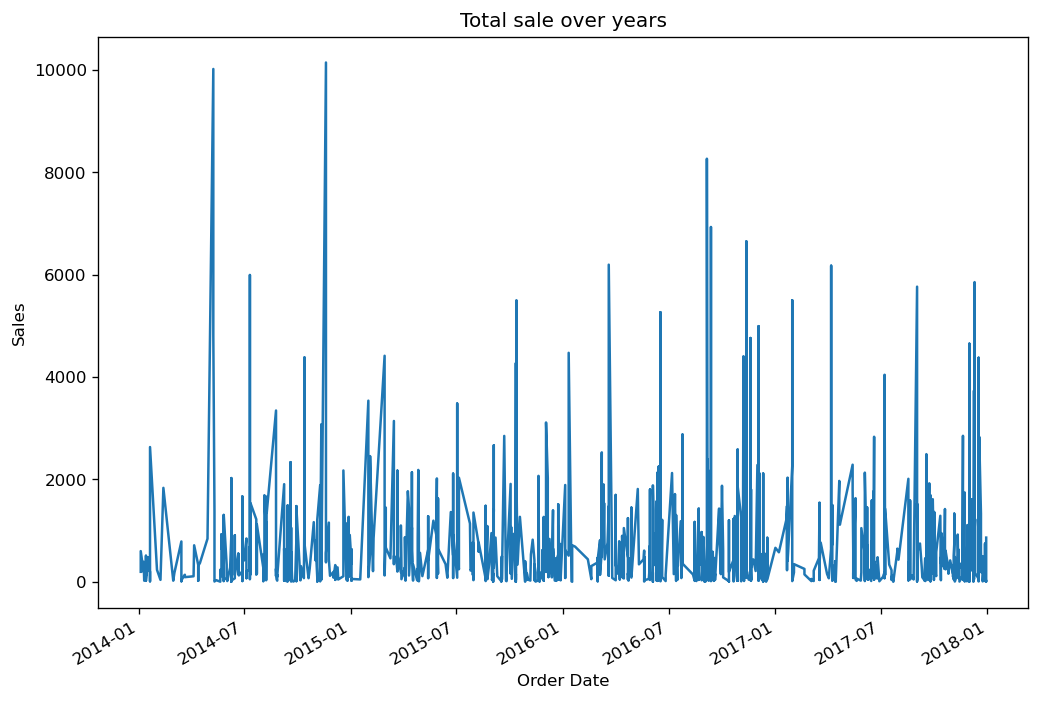

In [29]:
OS['Sales'].plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

In [ ]:
##The above is quite busy to interpret,
##we should use the resample function the time series data by Month and use the averages monthly values

In [30]:
#create new DataFrame
monthly_OS = pd.DataFrame()

monthly_OS['Sales'] = OS['Sales'].resample('MS').mean()

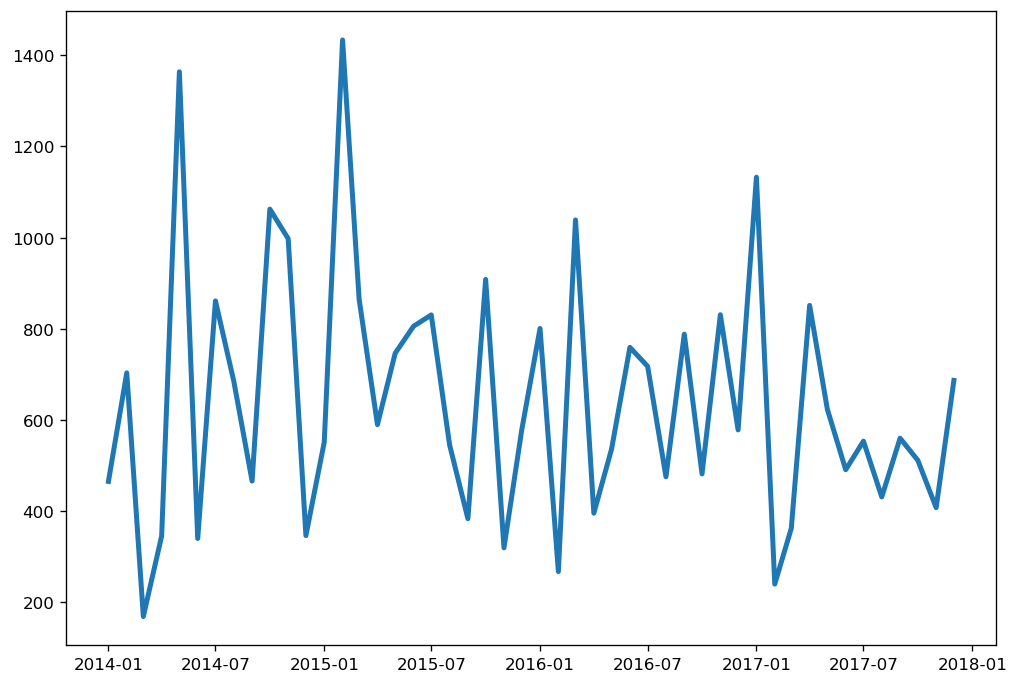

In [31]:
#plot weekly sales data
plt.plot(monthly_OS.index, monthly_OS.Sales, linewidth=3)

In [ ]:
##Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

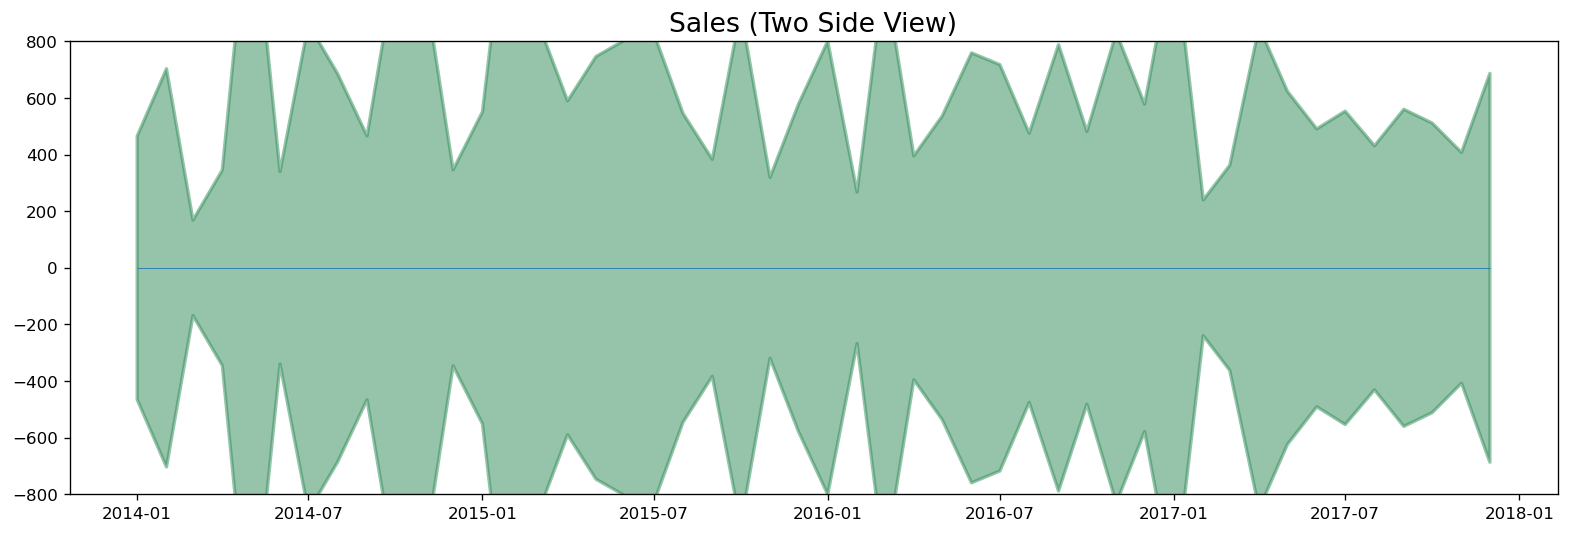

In [32]:
x= monthly_OS.index
y1= monthly_OS['Sales'].values

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(monthly_OS.index), xmax=np.max(monthly_OS.index), linewidth=.5)
plt.show()

In [ ]:
##We can nicely visualize the trend and how it varies each year in a nice year-wise boxplot.
##Likewise, we can do a month-wise boxplot to visualize the monthly distributions
##Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution
##We can group the data at seasonal intervals and see how the values are distributed within a given year 
##or month and how it compares over time.

In [33]:
OS['year'] = [d.year for d in OS.index]
OS['month'] = [d.strftime('%b') for d in OS.index]
years= OS['year'].unique()
years

array([2016, 2015, 2014, 2017], dtype=int64)

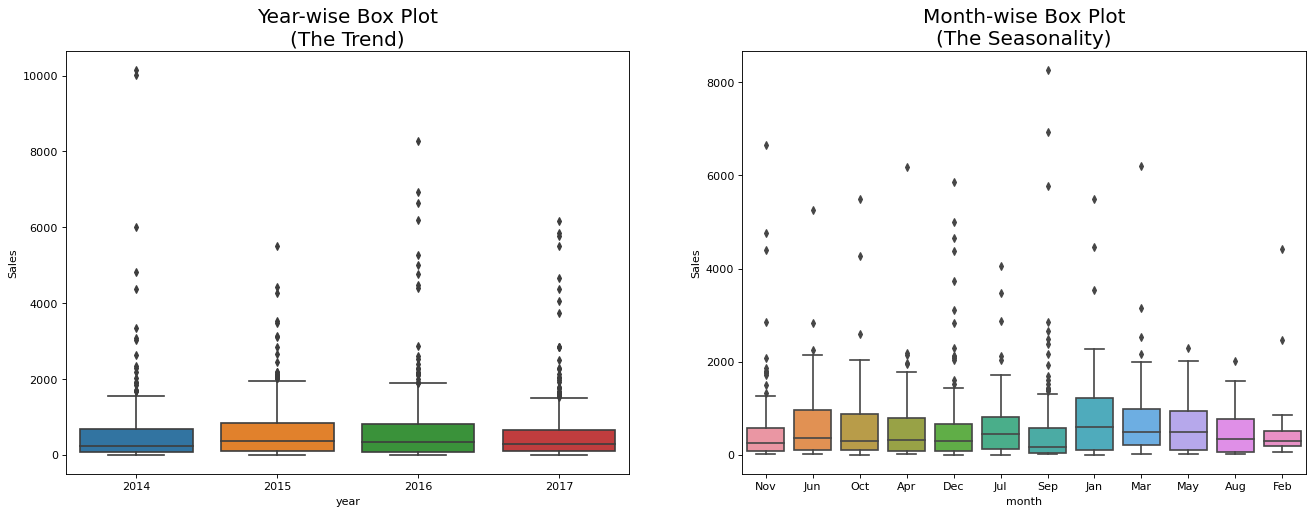

In [34]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=OS, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=OS.loc[~OS.year.isin([2014,2917]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

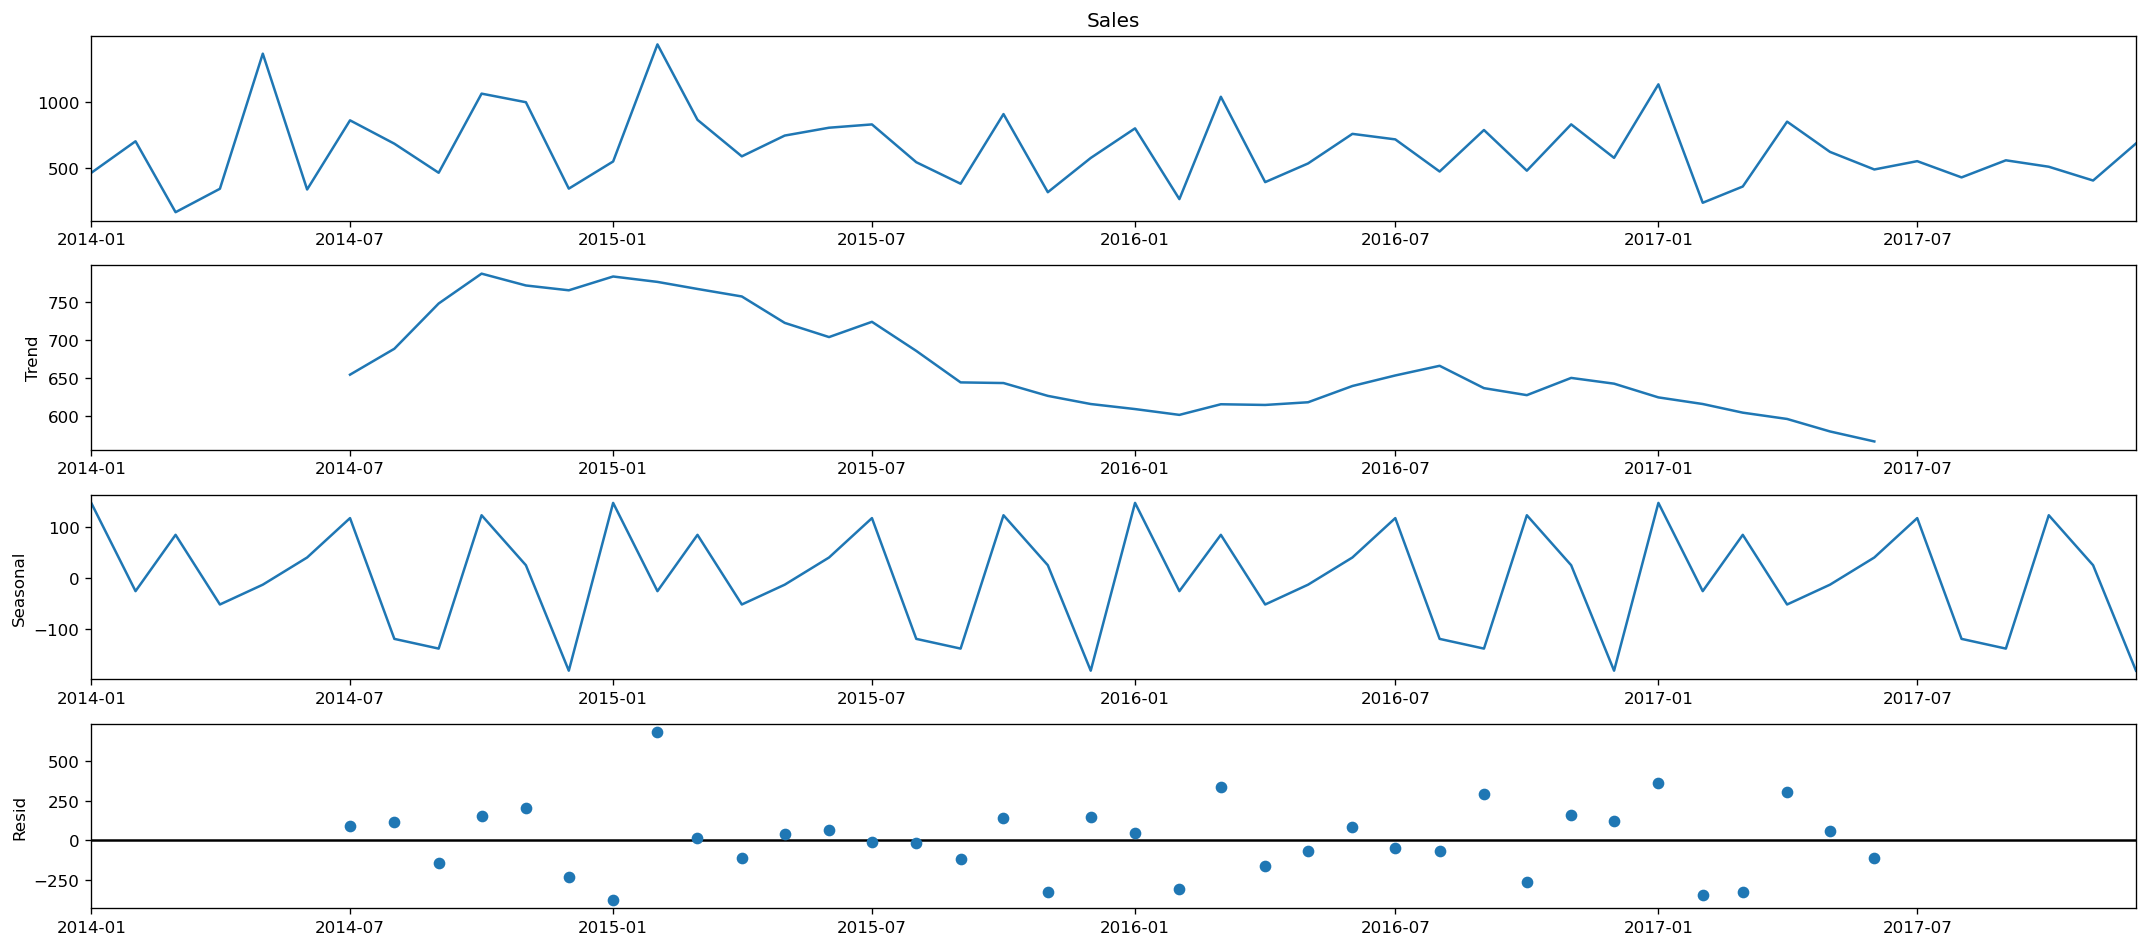

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_OS['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
##The plots show the data is seasonality

## STATIONARY OF THE DATASET

In [36]:
## Rolling statistics plot,

#Determing rolling statistics
moving_avg = monthly_OS.rolling(12).mean()
moving_std= monthly_OS.rolling(12).std()

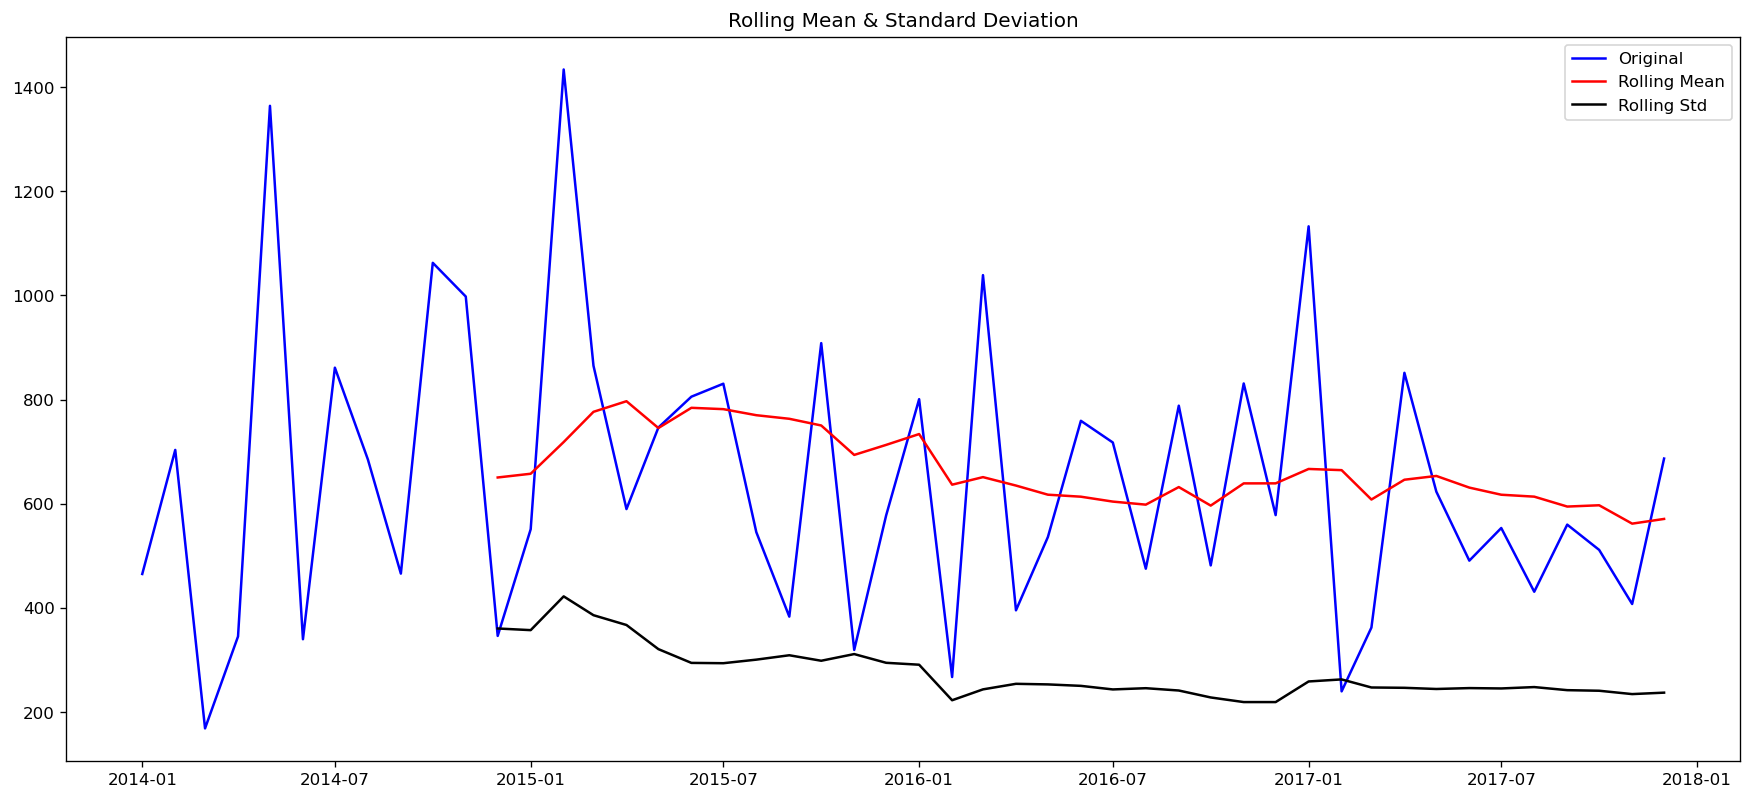

In [37]:
#Plot rolling statistics:
orig = plt.plot(monthly_OS, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [38]:
##Dickey-Fuller test,

from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_OS, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.630238
p-value                         0.467366
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [ ]:
## Since the p-value is not less than .05, we fail to reject the null hypothesis.
## This means the time series is non-stationary.

## MAKING THE TIME SERIES STATIONARY

In [50]:
##Log Transform,

do= pd.read_csv(r"C:\Users\APJ\OneDrive\Desktop\SUPERSTORE.csv")
store= do.loc[do['Category']=='Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
store.drop(cols, axis=1, inplace=True)
store

C:\Users\APJ\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [51]:
store = store.groupby('Order Date')['Sales'].sum().reset_index()
store

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430
...,...,...
1143,2017/12/26,814.594
1144,2017/12/27,13.248
1145,2017/12/28,1091.244
1146,2017/12/29,282.440


In [52]:
store = store.set_index('Order Date')
store.index

Index(['2014/01/03', '2014/01/04', '2014/01/05', '2014/01/06', '2014/01/07',
       '2014/01/09', '2014/01/10', '2014/01/13', '2014/01/16', '2014/01/18',
       ...
       '2017/12/21', '2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2017/12/27', '2017/12/28', '2017/12/29', '2017/12/30'],
      dtype='object', name='Order Date', length=1148)

In [54]:
#create new DataFrame:
store.index = pd.to_datetime(store.index)

y = store['Sales'].resample('MS').mean()

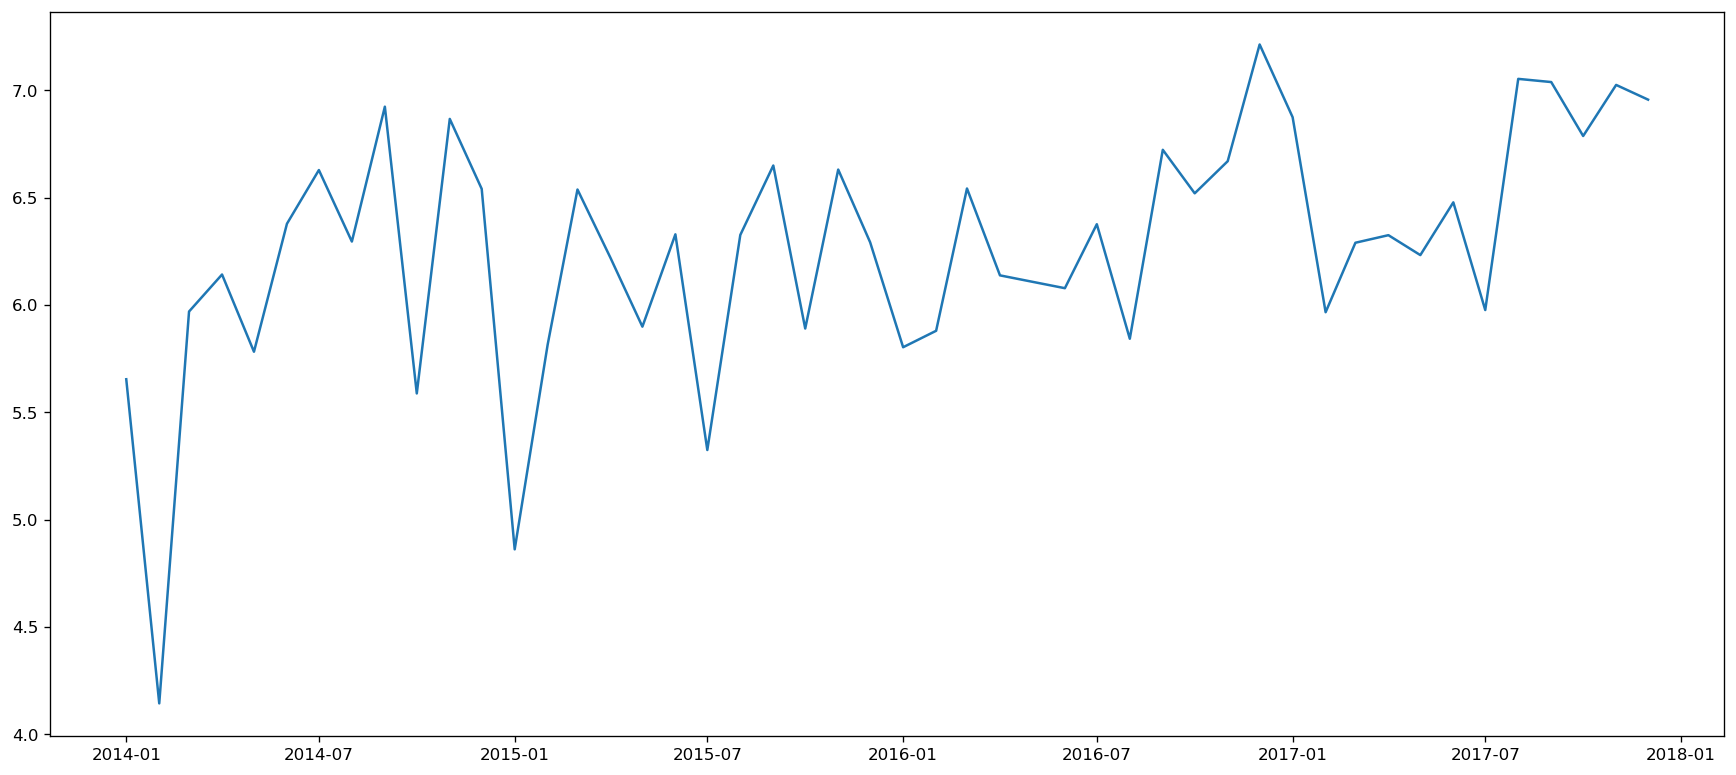

In [55]:
## Lets take a log transform here for simplicity:
ts_log = np.log(y)
plt.plot(ts_log)

In [ ]:
#In this case, we can see the plot is not a forward trend in the data. 
#So, take a log transform is not a solution to make a time-series stationary in this case

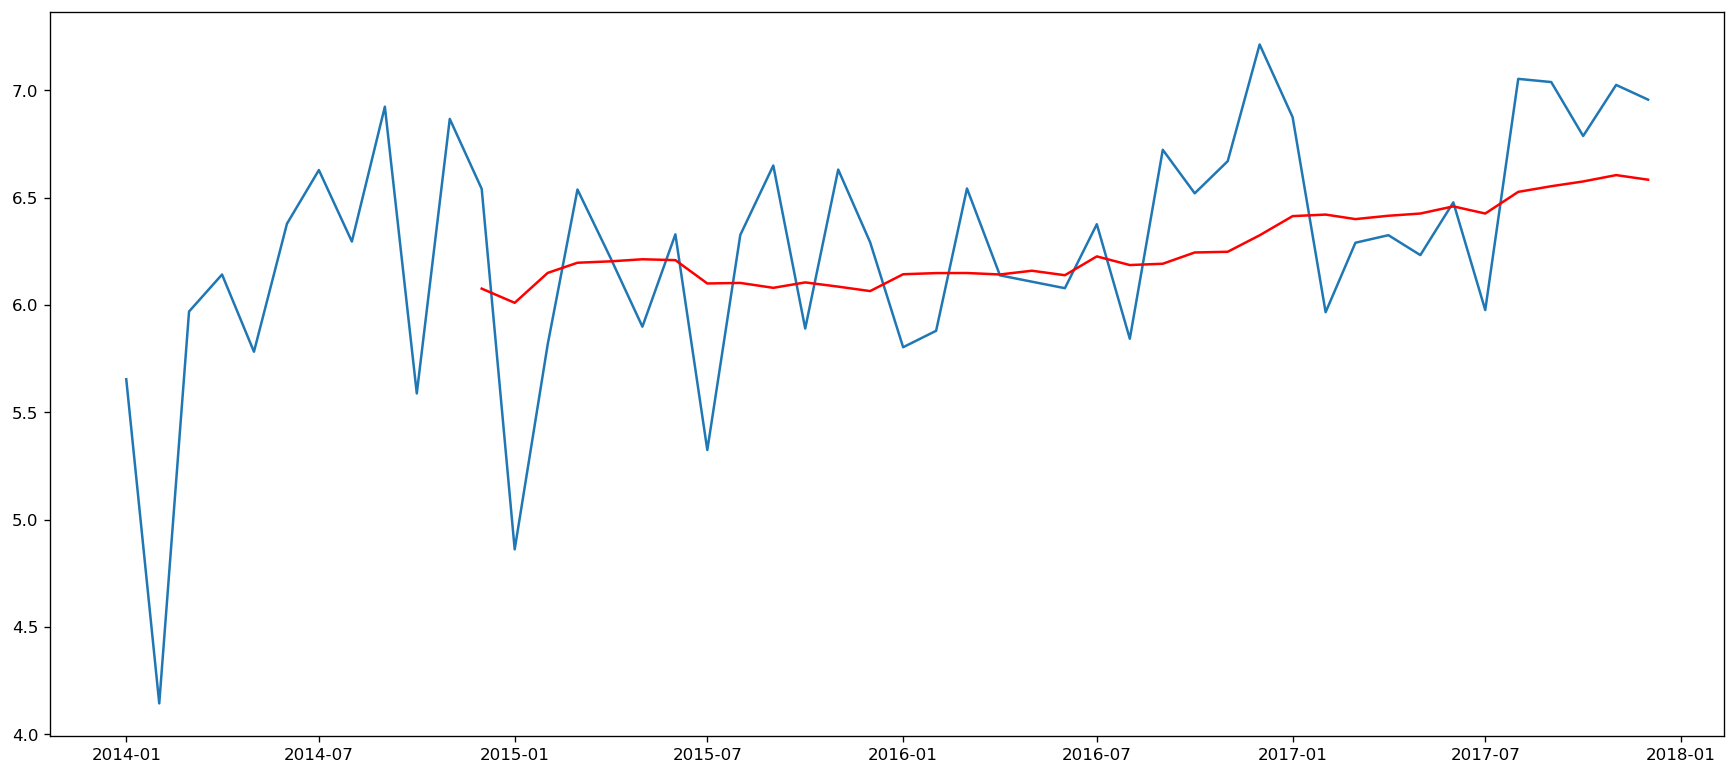

In [56]:
#b) Moving Average:

moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [57]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [59]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Order Date
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01         NaN
2014-11-01         NaN
2014-12-01    0.464652
Freq: MS, Name: Sales, dtype: float64

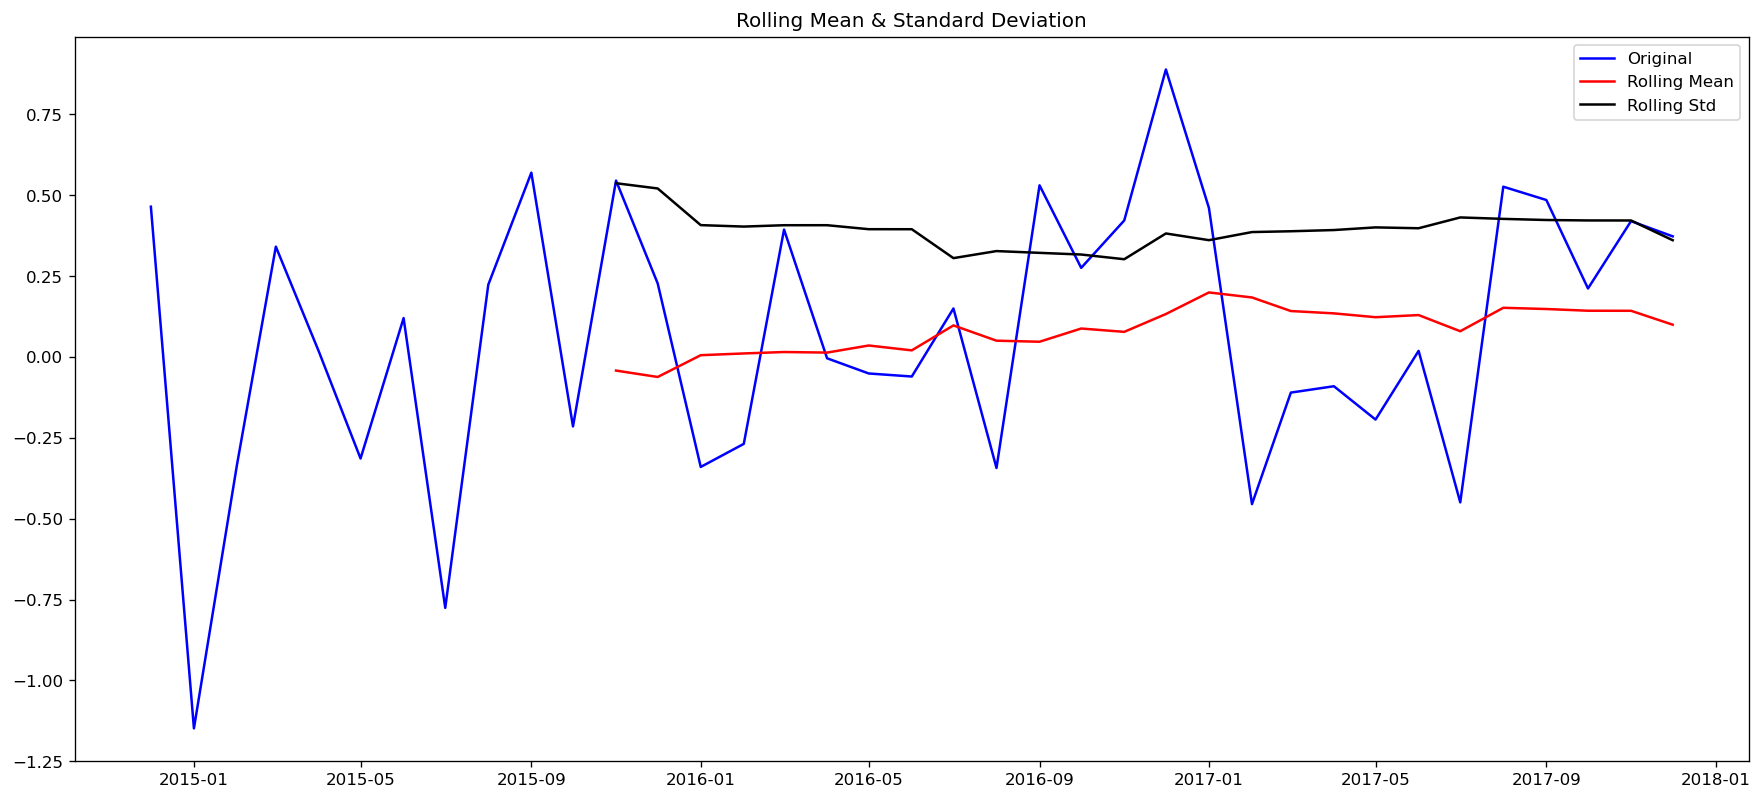

Results of Dickey-Fuller Test:
Test Statistic                 -5.626996
p-value                         0.000001
#Lags Used                      0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [60]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [61]:
## The Dickey-Fuller test statistic is less than the 1% critical value, thus the TS is stationary with 99% confidence.

## TIME SERIES FORECASTING WITH ARIMA

In [62]:
#Train test split,

train= y[:40]
test= y[40:]

In [63]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [65]:
# p,d,q using autoarima,

auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=592.497, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=576.965, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=559.020, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=554.143, Time=0.06 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=555.183, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=555.965, Time=0.13 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.009 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [66]:
auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=682.234, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=673.518, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=680.349, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=666.940, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=668.928, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=668.928, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=670.928, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=665.748, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=671.902, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=667.718, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=667.709, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=666.599, Time=0.1

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## BUILD ARIMA MODEL

In [67]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -273.088
Date:                Mon, 12 Dec 2022   AIC                            552.176
Time:                        19:56:04   BIC                            557.167
Sample:                    01-01-2014   HQIC                           553.967
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1424      0.249      0.573      0.567      -0.345       0.630
ma.L1         -0.9118      0.143     -6.398      0.000      -1.191      -0.632
sigma2      6.796e+04   1.48e+04      4.607      0.000     3.9e+04    9.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.60   Prob(JB):                         0.51
Heteroskedasticity (H):               0.84   Skew:                             0.45
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## PREDICT TEST DATASET

In [68]:
pred= model.predict(start=len(train), end=(len(y)-1),dynamic=True)
pred

2017-05-01    609.236649
2017-06-01    616.500447
2017-07-01    617.534862
2017-08-01    617.682170
2017-09-01    617.703148
2017-10-01    617.706135
2017-11-01    617.706561
2017-12-01    617.706621
Freq: MS, Name: predicted_mean, dtype: float64

In [69]:
test

Order Date
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

## ARIMA MODEL EVALUVATION USING MAPE

In [70]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

MAPE: 0.363205


In [ ]:
# this MAPE is on the higher side, lets try to dive deep,

## PLOT PREDICTION FOR TEST VALUE

<AxesSubplot:xlabel='Order Date'>

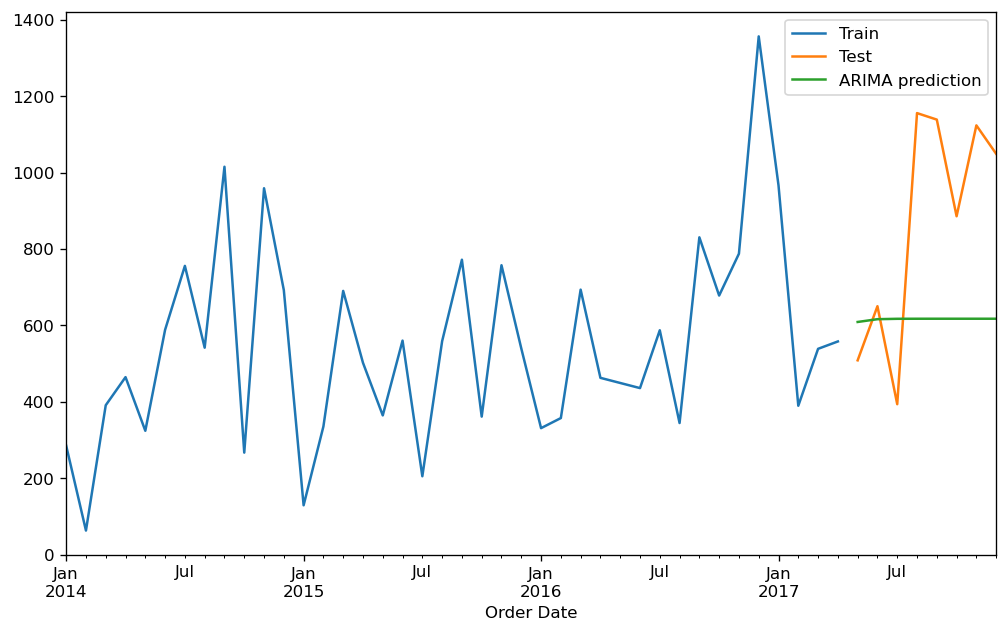

In [71]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')

In [72]:
## We can try to solve the above issue using SARIMAX

## TIMESERIES FORECAST USING SARIMAX

In [73]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

C:\Users\APJ\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -189.243
Date:                            Mon, 12 Dec 2022   AIC                            388.486
Time:                                    19:59:44   BIC                            394.965
Sample:                                01-01-2014   HQIC                           390.413
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2075      0.300      0.693      0.489      -0.380       0.795
ma.L1         -0.9253      0.326     -2.838      0.005      -1.564      -0.286
ar.S.L12       0.2317      0.758      0.305      0.760      -1.255       1.718
ma.S.L12      -0.9972      0.465     -2.144      0.032      -1.909      -0.085
sigma2      4.794e+04   9.81e-06   4.89e+09      0.000    4.79e+04    4.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.98   Prob(JB):                         0.18
Heteroskedasticity (H):               2.18   Skew:                             0.63
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.02e+27. Standard errors may be unstable.
"""

In [74]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

2017-05-01     524.240661
2017-06-01     636.978016
2017-07-01     686.343161
2017-08-01     583.600865
2017-09-01     997.206804
2017-10-01     638.862009
2017-11-01     957.404371
2017-12-01    1119.310231
Freq: MS, Name: predicted_mean, dtype: float64

## PLOT FORECAST DATA

<AxesSubplot:xlabel='Order Date'>

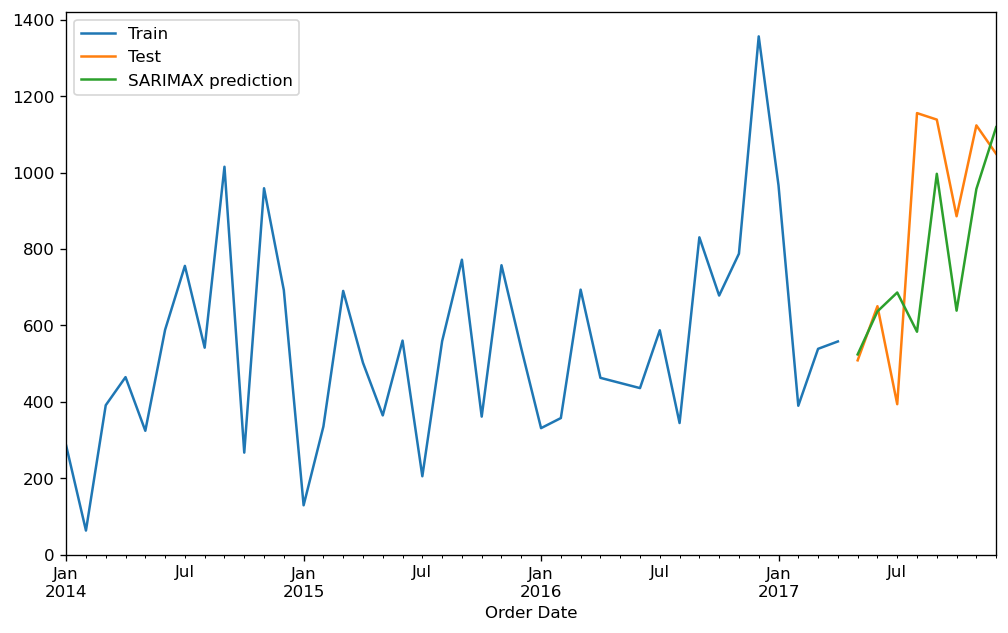

In [75]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

## EVALUVATING THE LASTEST MODEL USING MAPE

In [77]:
mape= mean_absolute_percentage_error(test, pre)

print('MAPE1: %f' %mape)

MAPE1: 0.238378


## PREDICT FUTURE SALE WITH ARIMAX:

In [78]:
future_sale= results.predict(start= len(y), end=(len(y)+12))
future_sale

2018-01-01     733.851199
2018-02-01     467.394100
2018-03-01     714.994875
2018-04-01     671.125648
2018-05-01     602.597042
2018-06-01     738.383321
2018-07-01     762.825762
2018-08-01     692.282793
2018-09-01    1089.004725
2018-10-01     682.943289
2018-11-01    1049.900457
2018-12-01    1117.468698
2019-01-01     733.071554
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Order Date'>

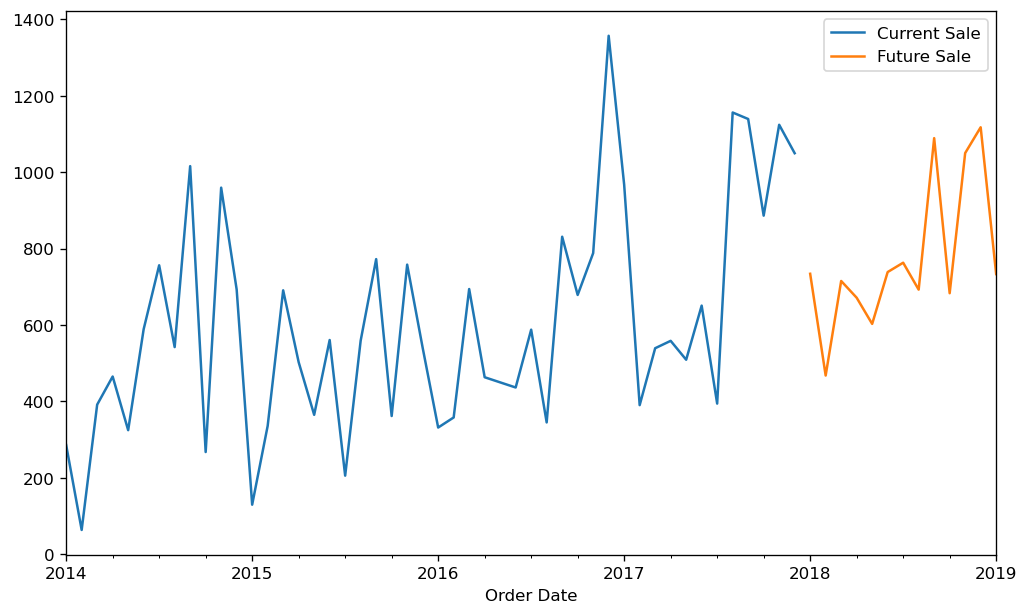

In [79]:
y.plot(legend=True, label='Current Sale', figsize=(10,6))

future_sale.plot(legend= True, label='Future Sale')

In [80]:
## Thus we have successfully predicted the demand of office supplies using time series data